<a href="https://colab.research.google.com/github/AiDisUpTorr/Anti-Fraud-Nexus/blob/main/ICFMFinal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [137]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [138]:
ins = pd.read_csv("/content/insurance_claims.csv")
ins.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


In [139]:
ins.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported', '_c39'],
      dtype='object')

In [140]:
ins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [141]:
ins.isnull().sum()

,0
months_as_customer,0
age,0
policy_number,0
policy_bind_date,0
policy_state,0
policy_csl,0
policy_deductable,0
policy_annual_premium,0
umbrella_limit,0
insured_zip,0


In [142]:
ins.replace(["?",'','-'], np.nan, inplace=True)

In [143]:
print((ins == "?").sum())

months_as_customer             0
age                            0
policy_number                  0
policy_bind_date               0
policy_state                   0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_zip                    0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_hobbies                0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_date                  0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
incident_location              0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_rep

In [144]:
print(ins.isnull().sum())

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                  178
incident_severity                 0
authorities_contacted            91
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

In [145]:
#Dropping the columns due to excess of null values and non important features#
features_to_drop = ['_c39','policy_number','insured_zip','policy_deductable']
ins.drop(columns=features_to_drop, inplace=True)
ins.head()

,months_as_customer,age,policy_bind_date,policy_state,policy_csl,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,2014-10-17,OH,250/500,1406.91,0,MALE,MD,craft-repair,...,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,2006-06-27,IN,250/500,1197.22,5000000,MALE,MD,machine-op-inspct,...,0,NaN,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,2000-09-06,OH,100/300,1413.14,5000000,FEMALE,PhD,sales,...,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,1990-05-25,IL,250/500,1415.74,6000000,FEMALE,PhD,armed-forces,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,2014-06-06,IL,500/1000,1583.91,6000000,MALE,Associate,sales,...,1,NO,6500,1300,650,4550,Accura,RSX,2009,N


In [146]:
from sklearn.preprocessing import LabelEncoder

# Create a label encoder instance
le = LabelEncoder()

# Fit and transform the 'fraud_reported' column
ins['fraud_reported'] = le.fit_transform(ins['fraud_reported'])

# Optional: Check the unique values after encoding
print(ins['fraud_reported'].unique())


[1 0]


In [147]:
#Handling the missing value in the following columns#
ins['collision_type'] = ins['collision_type'].fillna(ins['collision_type'].mode()[0])
ins['property_damage'] = ins['property_damage'].fillna('NO')
ins['police_report_available'] = ins['police_report_available'].fillna('NO')
# Fill missing values in 'authorities_contacted' with its most frequent value (mode)
ins['authorities_contacted'] = ins['authorities_contacted'].fillna(ins['authorities_contacted'].mode()[0])


In [148]:
ins.isnull().sum()

,0
months_as_customer,0
age,0
policy_bind_date,0
policy_state,0
policy_csl,0
policy_annual_premium,0
umbrella_limit,0
insured_sex,0
insured_education_level,0
insured_occupation,0


In [149]:
fraud = ins['fraud_reported'].value_counts()

label_fraud = fraud.index
size_fraud = fraud.values

In [150]:
label_fraud

Index([0, 1], dtype='int64', name='fraud_reported')

In [151]:
size_fraud

array([753, 247])

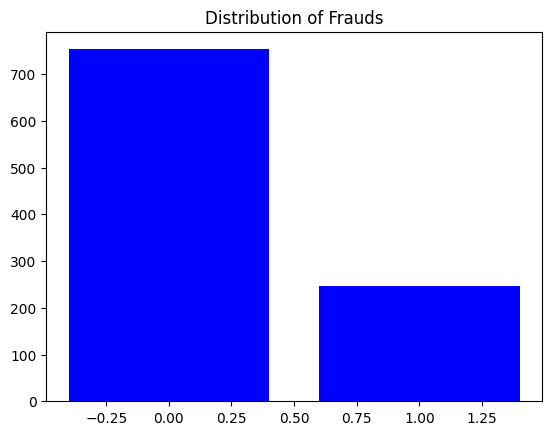

In [152]:
plt.bar(label_fraud,size_fraud, color='SkyBlue')
plt.bar(label_fraud,size_fraud, color='Blue')
plt.title("Distribution of Frauds")
plt.show()

<ipython-input-153-ed298b050d16>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=ins,


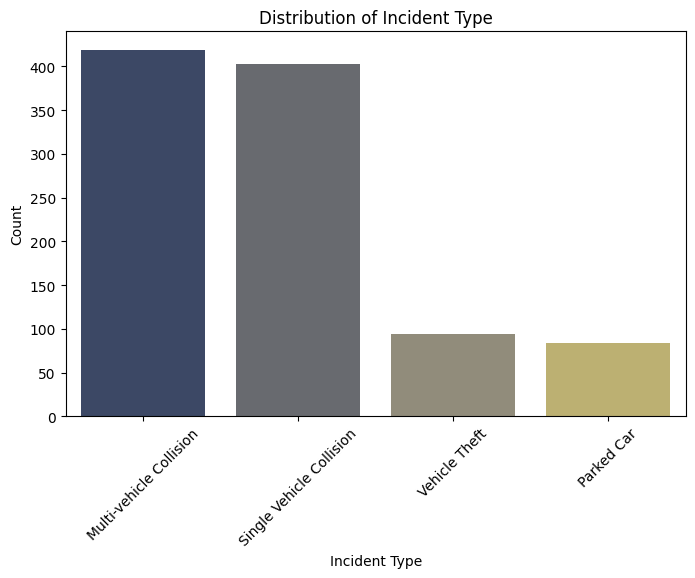

In [153]:
plt.figure(figsize=(8, 5))
sns.countplot(data=ins,
              x='incident_type',
              order=ins['incident_type'].value_counts().index,
              palette='cividis')
plt.title("Distribution of Incident Type")
plt.xlabel("Incident Type")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

<ipython-input-154-7c2d9910b96a>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=ins,


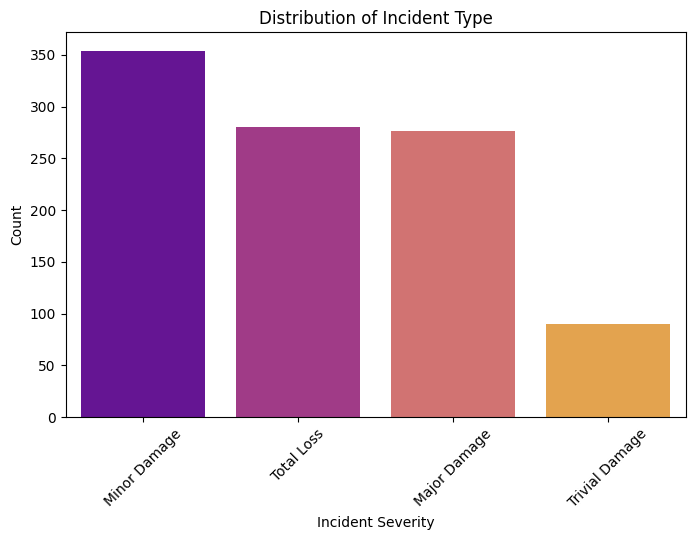

In [154]:
plt.figure(figsize=(8, 5))
sns.countplot(data=ins,
              x='incident_severity',
              order=ins['incident_severity'].value_counts().index,
              palette='plasma')
plt.title("Distribution of Incident Type")
plt.xlabel("Incident Severity")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

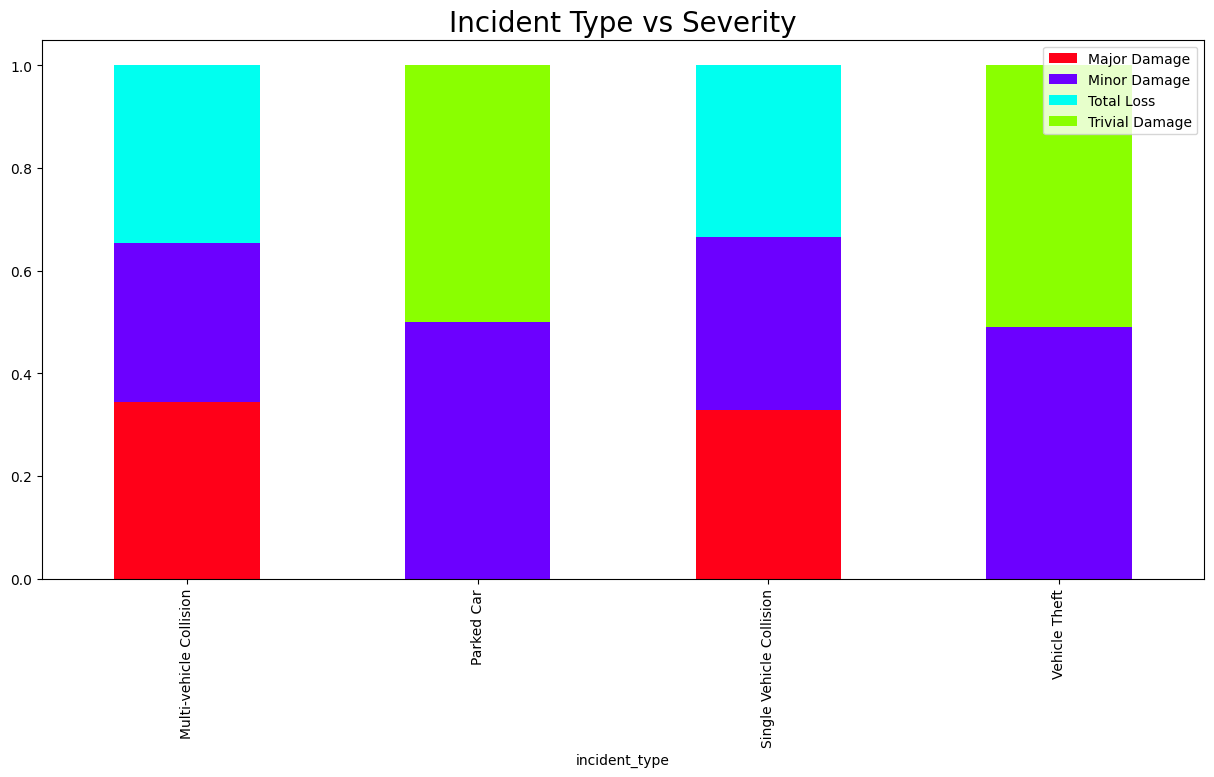

In [155]:
incident = pd.crosstab(ins['incident_type'], ins['incident_severity'])
colors = plt.cm.hsv_r(np.linspace(0, 1, 5))
incident.div(incident.sum(1).astype(float), axis = 0).plot(kind = 'bar',
                                                           stacked = True,
                                                           figsize = (15, 7),
                                                           color = colors)

plt.title('Incident Type vs Severity', fontsize = 20)
plt.legend()
plt.show()

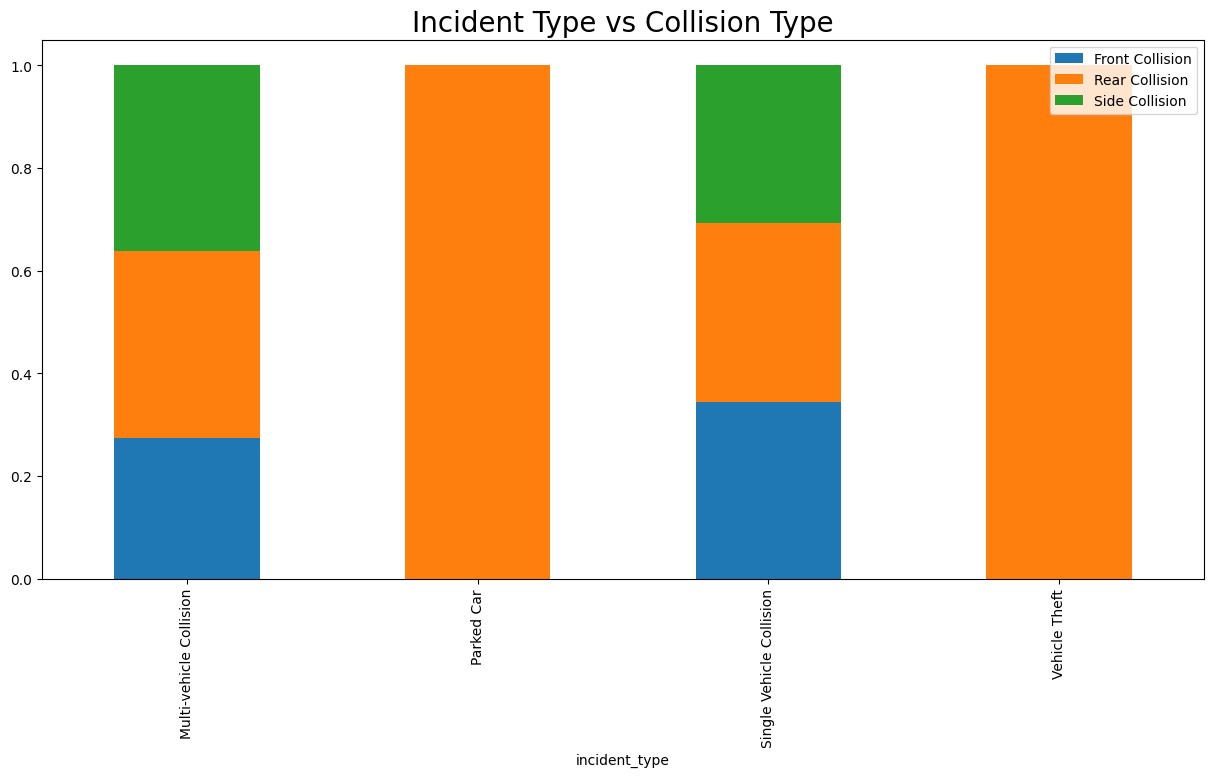

In [156]:
incident = pd.crosstab(ins['incident_type'], ins['collision_type'])
#colors = plt.cm.inferno(np.linspace(0, 1, 5))
incident.div(incident.sum(1).astype(float), axis = 0).plot(kind = 'bar',
                                                           stacked = True,
                                                           figsize = (15, 7))

plt.title('Incident Type vs Collision Type', fontsize = 20)
plt.legend()
plt.show()

<ipython-input-157-05c8027427de>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(ins['insured_occupation'],palette='cubehelix')


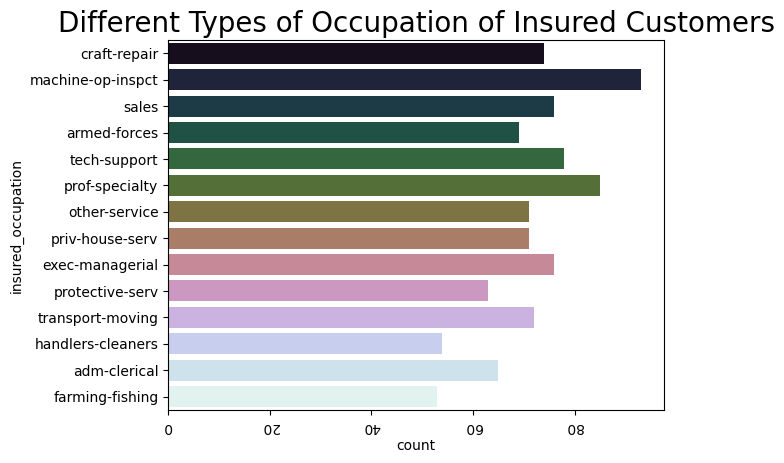

In [157]:
sns.countplot(ins['insured_occupation'],palette='cubehelix')
plt.title('Different Types of Occupation of Insured Customers', fontsize = 20)
plt.xticks(rotation=180)
plt.show()

<ipython-input-158-dbb01c0e1cb4>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(ins['insured_hobbies'], palette = 'cool')


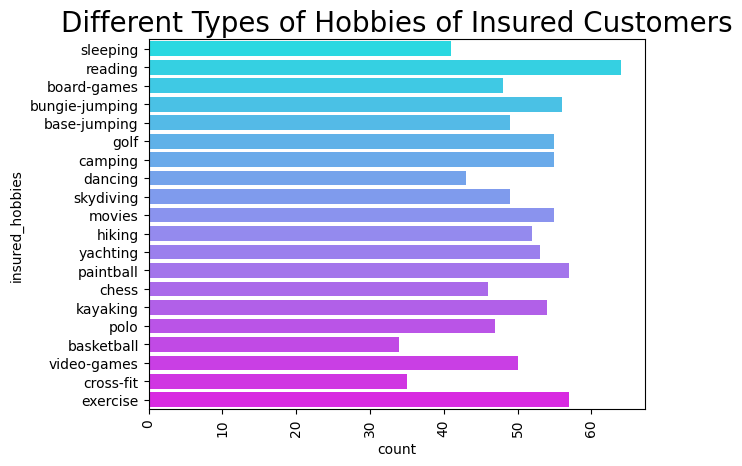

In [158]:
sns.countplot(ins['insured_hobbies'], palette = 'cool')
plt.title('Different Types of Hobbies of Insured Customers', fontsize = 20)
plt.xticks(rotation = 90)
plt.show()

<ipython-input-159-cf03fe1c666b>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.swarmplot(x='policy_state', y='total_claim_amount', data=ins, palette='cividis')
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 8.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 7.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


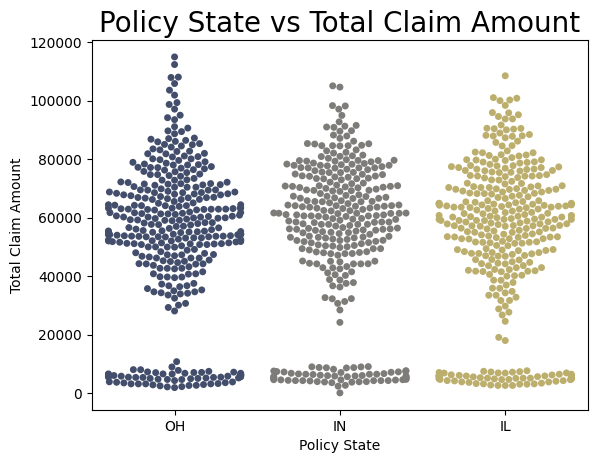

In [159]:
sns.swarmplot(x='policy_state', y='total_claim_amount', data=ins, palette='cividis')
plt.title('Policy State vs Total Claim Amount', fontsize=20)
plt.xlabel('Policy State')
plt.ylabel('Total Claim Amount')
plt.show()


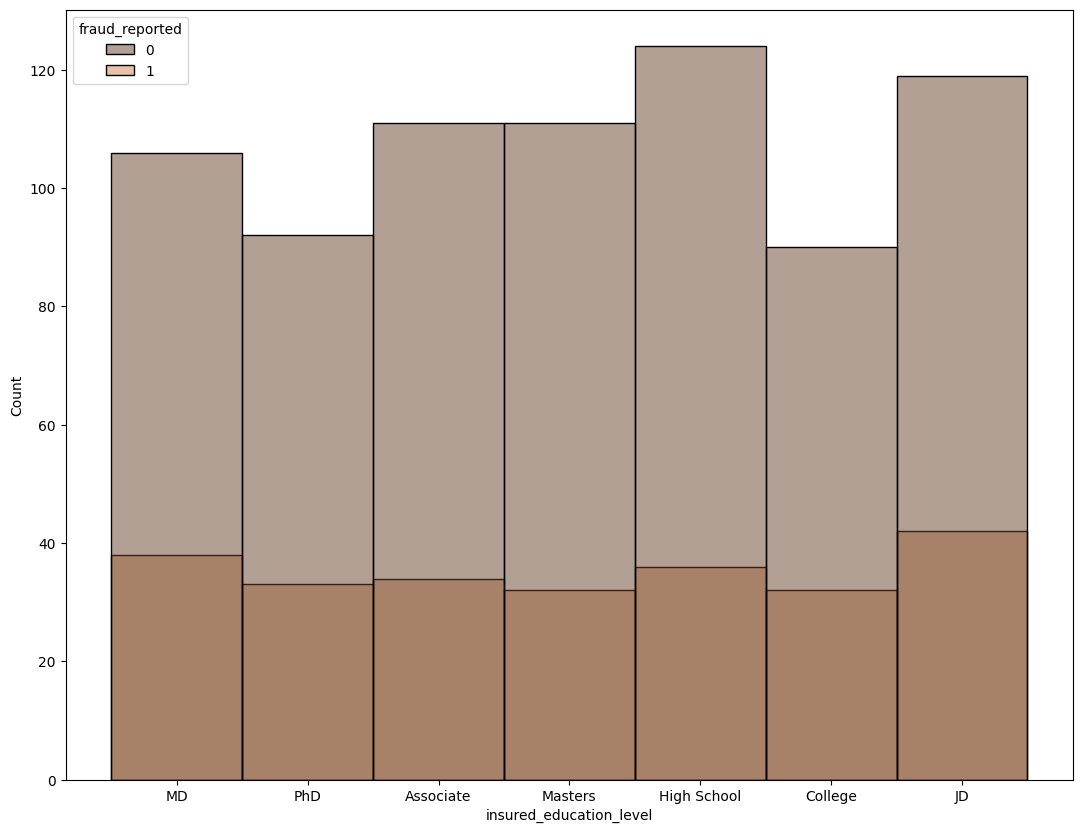

In [160]:
plt.figure(figsize=[13,10])
sns.histplot(ins,x='insured_education_level', palette = 'copper',hue='fraud_reported')
#plt.title('Policy State vs Total Claim Amount', fontsize = 20)
plt.show()

In [161]:
auto = ins['auto_model']
auto

,auto_model
0,92x
1,E400
2,RAM
3,Tahoe
4,RSX
...,...
995,Accord
996,Passat
997,Impreza
998,A5


In [162]:
!pip install category_encoders

In [163]:
from category_encoders import TargetEncoder
encoder = TargetEncoder()
ins['auto_model'] = encoder.fit_transform(ins['auto_model'], ins['fraud_reported'])

In [164]:
ins['auto_model']

,auto_model
0,0.273712
1,0.255191
2,0.318421
3,0.323632
4,0.196259
...,...
995,0.241614
996,0.267217
997,0.273500
998,0.321355


In [165]:
ins['auto_model'].value_counts()

,count
auto_model,
0.273712,56
0.318421,43
0.131811,42
0.198500,40
0.266676,37
0.175267,37
0.226384,36
0.278652,35
0.267217,33


In [166]:
ins['auto_model'].value_counts()

,count
auto_model,
0.273712,56
0.318421,43
0.131811,42
0.198500,40
0.266676,37
0.175267,37
0.226384,36
0.278652,35
0.267217,33


In [167]:
ins['auto_make']

,auto_make
0,Saab
1,Mercedes
2,Dodge
3,Chevrolet
4,Accura
...,...
995,Honda
996,Volkswagen
997,Suburu
998,Audi


In [168]:
ins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 36 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_bind_date             1000 non-null   object 
 3   policy_state                 1000 non-null   object 
 4   policy_csl                   1000 non-null   object 
 5   policy_annual_premium        1000 non-null   float64
 6   umbrella_limit               1000 non-null   int64  
 7   insured_sex                  1000 non-null   object 
 8   insured_education_level      1000 non-null   object 
 9   insured_occupation           1000 non-null   object 
 10  insured_hobbies              1000 non-null   object 
 11  insured_relationship         1000 non-null   object 
 12  capital-gains                1000 non-null   int64  
 13  capital-loss       

In [169]:
ins['police_report_available'] = encoder.fit_transform(ins['police_report_available'],ins['fraud_reported'])

In [170]:
ins['police_report_available']

,police_report_available
0,0.229299
1,0.255102
2,0.255102
3,0.255102
4,0.255102
...,...
995,0.255102
996,0.255102
997,0.229299
998,0.229299


In [171]:
ins['property_damage'] = encoder.fit_transform(ins['property_damage'],ins['fraud_reported'])
ins['incident_city'] = encoder.fit_transform(ins['incident_city'],ins['fraud_reported'])
ins['incident_state'] = encoder.fit_transform(ins['incident_state'],ins['fraud_reported'])
ins['authorities_contacted'] = encoder.fit_transform(ins['authorities_contacted'],ins['fraud_reported'])
ins['incident_severity'] = encoder.fit_transform(ins['incident_severity'],ins['fraud_reported'])
ins['collision_type'] = encoder.fit_transform(ins['collision_type'],ins['fraud_reported'])
ins['incident_type'] = encoder.fit_transform(ins['incident_type'],ins['fraud_reported'])
ins['incident_date'] = pd.to_datetime(ins['incident_date'], errors = 'coerce')
ins['incident_month'] = ins['incident_date'].dt.month
ins['incident_day'] = ins['incident_date'].dt.day
ins['insured_relationship'] = encoder.fit_transform(ins['insured_relationship'],ins['fraud_reported'])
ins['insured_hobbies'] = encoder.fit_transform(ins['insured_hobbies'],ins['fraud_reported'])
ins['insured_occupation'] = encoder.fit_transform(ins['insured_occupation'],ins['fraud_reported'])
ins['insured_education_level'] = encoder.fit_transform(ins['insured_education_level'],ins['fraud_reported'])
ins['insured_sex'] = encoder.fit_transform(ins['insured_sex'],ins['fraud_reported'])
ins['policy_csl'] = encoder.fit_transform(ins['policy_csl'],ins['fraud_reported'])
ins['policy_state'] = encoder.fit_transform(ins['policy_state'],ins['fraud_reported'])
ins['incident_location'] = encoder.fit_transform(ins['incident_location'],ins['fraud_reported'])


In [172]:
ins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 38 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   months_as_customer           1000 non-null   int64         
 1   age                          1000 non-null   int64         
 2   policy_bind_date             1000 non-null   object        
 3   policy_state                 1000 non-null   float64       
 4   policy_csl                   1000 non-null   float64       
 5   policy_annual_premium        1000 non-null   float64       
 6   umbrella_limit               1000 non-null   int64         
 7   insured_sex                  1000 non-null   float64       
 8   insured_education_level      1000 non-null   float64       
 9   insured_occupation           1000 non-null   float64       
 10  insured_hobbies              1000 non-null   float64       
 11  insured_relationship         1000 non-null  

In [173]:
ins = ins.drop(['policy_bind_date','incident_location','auto_model'], axis = 1)

# let's check the columns after deleting the columns
ins.columns

Index(['months_as_customer', 'age', 'policy_state', 'policy_csl',
       'policy_annual_premium', 'umbrella_limit', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_hour_of_the_day', 'number_of_vehicles_involved',
       'property_damage', 'bodily_injuries', 'witnesses',
       'police_report_available', 'total_claim_amount', 'injury_claim',
       'property_claim', 'vehicle_claim', 'auto_make', 'auto_year',
       'fraud_reported', 'incident_month', 'incident_day'],
      dtype='object')

In [174]:
ins.shape

(1000, 35)

In [175]:
#Dealing with the Data and Time kind of categorical values#
ins['auto_year'] = pd.to_datetime(ins['auto_year'])
ins['months_as_customer'] = pd.to_datetime(ins['months_as_customer'])

In [176]:
ins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 35 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   months_as_customer           1000 non-null   datetime64[ns]
 1   age                          1000 non-null   int64         
 2   policy_state                 1000 non-null   float64       
 3   policy_csl                   1000 non-null   float64       
 4   policy_annual_premium        1000 non-null   float64       
 5   umbrella_limit               1000 non-null   int64         
 6   insured_sex                  1000 non-null   float64       
 7   insured_education_level      1000 non-null   float64       
 8   insured_occupation           1000 non-null   float64       
 9   insured_hobbies              1000 non-null   float64       
 10  insured_relationship         1000 non-null   float64       
 11  capital-gains                1000 non-null  

In [177]:
print(ins['auto_make'].isnull().sum())   # Missing?
print(ins['auto_make'].nunique())        # Unique brands?
print(ins['auto_make'].value_counts())   # Any typos or rare brands?


0
14
auto_make
Saab          80
Dodge         80
Suburu        80
Nissan        78
Chevrolet     76
Ford          72
BMW           72
Toyota        70
Audi          69
Accura        68
Volkswagen    68
Jeep          67
Mercedes      65
Honda         55
Name: count, dtype: int64


In [178]:
from category_encoders import TargetEncoder

encoder = TargetEncoder(cols=['auto_make'])
ins['auto_make_encoded'] = encoder.fit_transform(ins['auto_make'], ins['fraud_reported'])


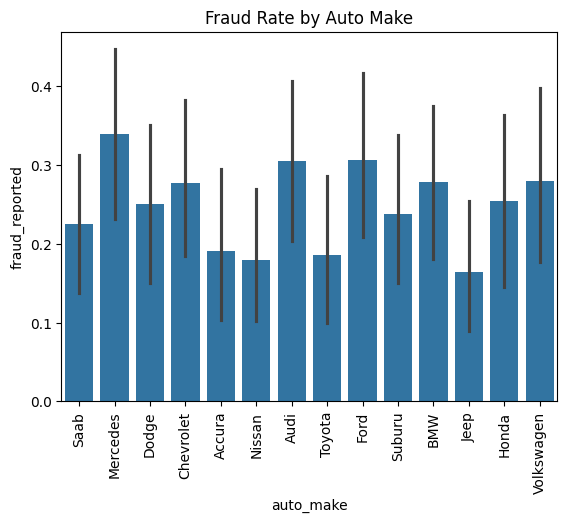

In [179]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(data=ins, x='auto_make', y='fraud_reported', estimator=lambda x: sum(x)/len(x))
plt.xticks(rotation=90)
plt.title("Fraud Rate by Auto Make")
plt.show()


In [180]:
ins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 36 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   months_as_customer           1000 non-null   datetime64[ns]
 1   age                          1000 non-null   int64         
 2   policy_state                 1000 non-null   float64       
 3   policy_csl                   1000 non-null   float64       
 4   policy_annual_premium        1000 non-null   float64       
 5   umbrella_limit               1000 non-null   int64         
 6   insured_sex                  1000 non-null   float64       
 7   insured_education_level      1000 non-null   float64       
 8   insured_occupation           1000 non-null   float64       
 9   insured_hobbies              1000 non-null   float64       
 10  insured_relationship         1000 non-null   float64       
 11  capital-gains                1000 non-null  

In [181]:
ins['incident_date'] = pd.to_datetime(ins['incident_date'], errors = 'coerce')
ins['incident_month'] = ins['incident_date'].dt.month
ins['incident_day'] = ins['incident_date'].dt.day

In [182]:
ins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 36 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   months_as_customer           1000 non-null   datetime64[ns]
 1   age                          1000 non-null   int64         
 2   policy_state                 1000 non-null   float64       
 3   policy_csl                   1000 non-null   float64       
 4   policy_annual_premium        1000 non-null   float64       
 5   umbrella_limit               1000 non-null   int64         
 6   insured_sex                  1000 non-null   float64       
 7   insured_education_level      1000 non-null   float64       
 8   insured_occupation           1000 non-null   float64       
 9   insured_hobbies              1000 non-null   float64       
 10  insured_relationship         1000 non-null   float64       
 11  capital-gains                1000 non-null  

In [183]:
ins

,months_as_customer,age,policy_state,policy_csl,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_hobbies,...,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_year,fraud_reported,incident_month,incident_day,auto_make_encoded
0,1970-01-01 00:00:00.000000328,48,0.258523,0.262108,1406.91,0,0.261339,0.263889,0.297071,0.200782,...,71610,6510,13020,52080,Saab,1970-01-01 00:00:00.000002004,1,1,25,0.225054
1,1970-01-01 00:00:00.000000228,42,0.254839,0.262108,1197.22,5000000,0.261339,0.263889,0.236566,0.265399,...,5070,780,780,3510,Mercedes,1970-01-01 00:00:00.000002007,1,1,21,0.337457
2,1970-01-01 00:00:00.000000134,29,0.258523,0.257880,1413.14,5000000,0.234637,0.264000,0.276208,0.289106,...,34650,7700,3850,23100,Dodge,1970-01-01 00:00:00.000002007,0,2,22,0.249993
3,1970-01-01 00:00:00.000000256,41,0.227811,0.262108,1415.74,6000000,0.234637,0.264000,0.246381,0.289106,...,63400,6340,6340,50720,Chevrolet,1970-01-01 00:00:00.000002014,1,1,10,0.276208
4,1970-01-01 00:00:00.000000228,44,0.227811,0.216667,1583.91,6000000,0.261339,0.234483,0.276208,0.289106,...,6500,1300,650,4550,Accura,1970-01-01 00:00:00.000002009,0,2,17,0.191632
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1970-01-01 00:00:00.000000003,38,0.258523,0.216667,1310.80,0,0.234637,0.223776,0.297071,0.228527,...,87200,17440,8720,61040,Honda,1970-01-01 00:00:00.000002006,0,2,22,0.254324
996,1970-01-01 00:00:00.000000285,41,0.227811,0.257880,1436.79,0,0.234637,0.264000,0.211818,0.200782,...,108480,18080,18080,72320,Volkswagen,1970-01-01 00:00:00.000002015,0,1,24,0.279147
997,1970-01-01 00:00:00.000000130,34,0.258523,0.262108,1383.49,3000000,0.234637,0.223776,0.246381,0.163009,...,67500,7500,7500,52500,Suburu,1970-01-01 00:00:00.000001996,0,1,23,0.237523
998,1970-01-01 00:00:00.000000458,62,0.227811,0.216667,1356.92,5000000,0.261339,0.234483,0.205102,0.264351,...,46980,5220,5220,36540,Audi,1970-01-01 00:00:00.000001998,0,2,26,0.303924


In [184]:
x1 = ins.drop(['fraud_reported'], axis = 1)
y1 = ins['fraud_reported']

print("Shape of x1 :", x1.shape)
print("Shape of y1 :", y1.shape)

Shape of x1 : (1000, 35)
Shape of y1 : (1000,)


In [195]:
ins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 36 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   months_as_customer           1000 non-null   datetime64[ns]
 1   age                          1000 non-null   int64         
 2   policy_state                 1000 non-null   float64       
 3   policy_csl                   1000 non-null   float64       
 4   policy_annual_premium        1000 non-null   float64       
 5   umbrella_limit               1000 non-null   int64         
 6   insured_sex                  1000 non-null   float64       
 7   insured_education_level      1000 non-null   float64       
 8   insured_occupation           1000 non-null   float64       
 9   insured_hobbies              1000 non-null   float64       
 10  insured_relationship         1000 non-null   float64       
 11  capital-gains                1000 non-null  

In [197]:
ins['months_as_customer_month'] = ins['months_as_customer'].dt.month
ins['months_as_customer_year'] = ins['months_as_customer'].dt.year
ins['auto_year_year'] = ins['auto_year'].dt.year

# Drop original datetime columns
ins.drop(['months_as_customer', 'incident_date', 'auto_year'], axis=1, inplace=True)


In [198]:
ins.drop(['auto_make'], axis=1, inplace=True)


In [200]:
print(ins.isnull().sum().sort_values(ascending=False).head())


age                      0
policy_state             0
policy_csl               0
policy_annual_premium    0
umbrella_limit           0
dtype: int64


In [204]:
x = ins.drop('fraud_reported', axis=1)
X = x.select_dtypes(include=['int64', 'float64', 'int32'])
y = ins['fraud_reported']


In [205]:
# Function to remove highly correlated columns based on a threshold
def correlation(dataset, threshold):
    col_corr = set()  # Set to store names of correlated columns
    corr_matrix = dataset.corr()

    # Iterate through the correlation matrix to find highly correlated columns
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) >= threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)

    # Drop all highly correlated columns from the dataset
    dataset = dataset.drop(columns=col_corr)
    return dataset

# Apply correlation function to remove highly correlated columns
xnew = correlation(X, 0.9)

# Show the result
print


<function print(*args, sep=' ', end='\n', file=None, flush=False)>

In [206]:
import statsmodels.api as sm

def backwardElimination_classification(X, y, sl):
    numVars = len(X.columns)  # Number of features (including intercept term)
    columns = X.columns  # Feature names

    # Add constant term (intercept) to X
    X = sm.add_constant(X)

    # Loop through and remove features based on p-value
    for i in range(0, numVars):
        # Fit logistic regression model
        model = sm.Logit(y, X).fit()

        # Get p-values for each feature
        p_values = model.pvalues
        maxVar = max(p_values)  # Find the maximum p-value

        # If p-value > significance level, drop that feature
        if maxVar > sl:
            maxVarIndex = p_values.idxmax()  # Find the feature with the highest p-value
            X = X.drop(maxVarIndex, axis=1)  # Drop that feature
            columns = columns.drop(maxVarIndex)  # Update columns list

    # Return updated dataset and selected features
    return X, columns


In [207]:
ins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 35 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   age                          1000 non-null   int64  
 1   policy_state                 1000 non-null   float64
 2   policy_csl                   1000 non-null   float64
 3   policy_annual_premium        1000 non-null   float64
 4   umbrella_limit               1000 non-null   int64  
 5   insured_sex                  1000 non-null   float64
 6   insured_education_level      1000 non-null   float64
 7   insured_occupation           1000 non-null   float64
 8   insured_hobbies              1000 non-null   float64
 9   insured_relationship         1000 non-null   float64
 10  capital-gains                1000 non-null   int64  
 11  capital-loss                 1000 non-null   int64  
 12  incident_type                1000 non-null   float64
 13  collision_type     

In [208]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(xnew,y, test_size = 0.25, random_state = 42)

print("Shape of x_train :", x_train.shape)
print("Shape of x_test :", x_test.shape)
print("Shape of y_train :", y_train.shape)
print("Shape of y_test :", y_test.shape)

Shape of x_train : (750, 33)
Shape of x_test : (250, 33)
Shape of y_train : (750,)
Shape of y_test : (250,)


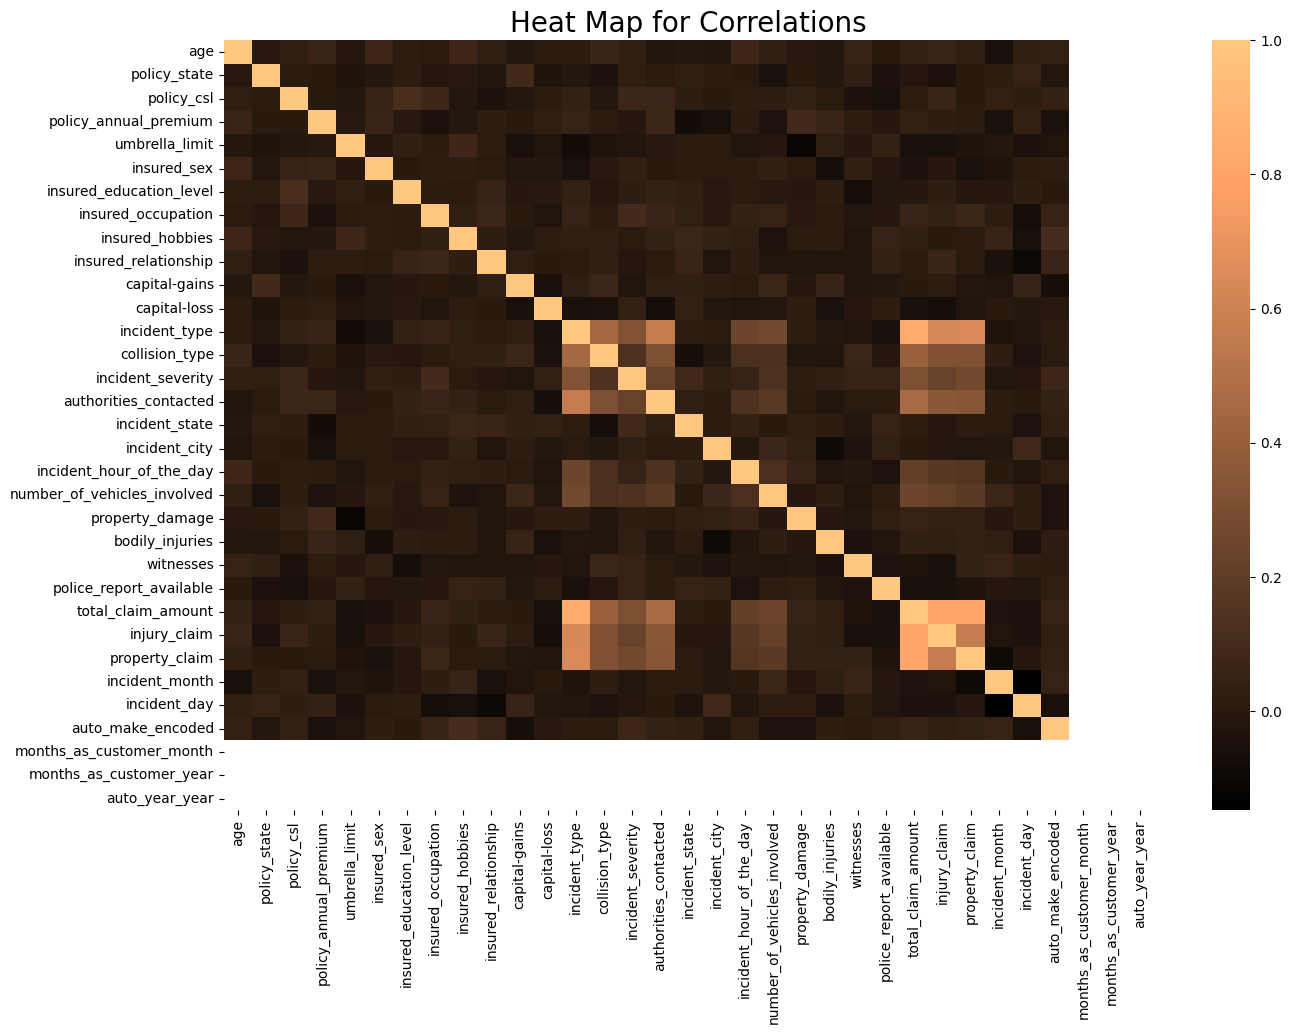

In [209]:
plt.rcParams['figure.figsize'] = (15, 10)
sns.heatmap(x_train.corr(), cmap = 'copper')
plt.title('Heat Map for Correlations', fontsize = 20)
plt.show()

In [210]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
model= RandomForestClassifier( oob_score = True, n_estimators= 100, n_jobs= -1, min_samples_split = 10, max_features='log2', max_depth = None)
model1= GradientBoostingClassifier(n_estimators= 100,min_samples_split = 10, max_features='log2', max_depth = None)

Training Accuracy:  0.98
Testing Accuarcy:  0.768
              precision    recall  f1-score   support

           0       0.80      0.92      0.85       183
           1       0.62      0.36      0.45        67

    accuracy                           0.77       250
   macro avg       0.71      0.64      0.65       250
weighted avg       0.75      0.77      0.75       250



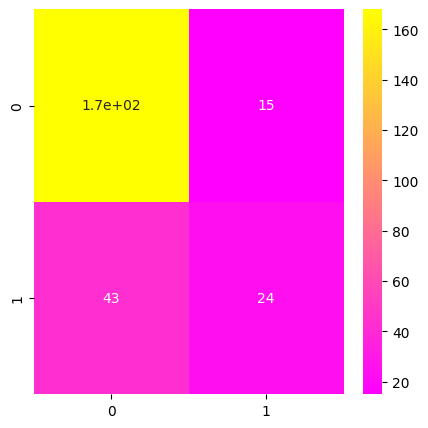

In [211]:
model.fit(x_train, y_train)
y_pred_rf = model.predict(x_test)

print("Training Accuracy: ", model.score(x_train, y_train))
print('Testing Accuarcy: ', model.score(x_test, y_test))

cr = classification_report(y_test,  y_pred_rf)
print(cr)

plt.rcParams['figure.figsize'] = (5, 5)
cm = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm, annot = True, cmap = 'spring')
plt.show()

<Axes: >

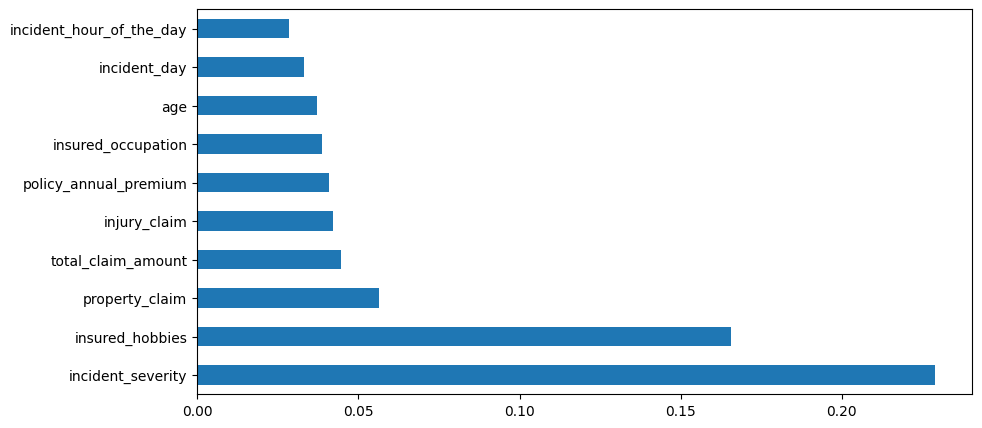

In [212]:
from pylab import rcParams
rcParams['figure.figsize'] = 10, 5
feat_importances = pd.Series(model.feature_importances_, index=xnew.columns)
feat_importances.nlargest(10).plot(kind='barh')

Training Accuracy:  1.0
Testing Accuarcy:  0.8
              precision    recall  f1-score   support

           0       0.84      0.90      0.87       183
           1       0.65      0.54      0.59        67

    accuracy                           0.80       250
   macro avg       0.75      0.72      0.73       250
weighted avg       0.79      0.80      0.79       250



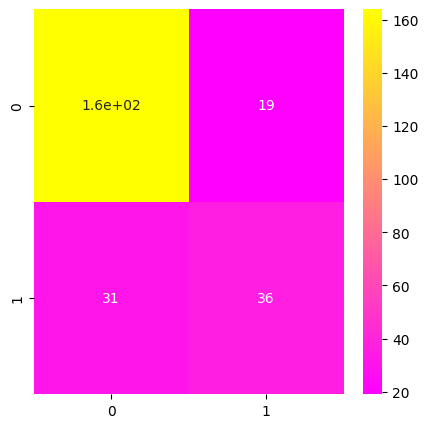

In [213]:
model1.fit(x_train, y_train)
y_pred_rf1 = model1.predict(x_test)

print("Training Accuracy: ", model1.score(x_train, y_train))
print('Testing Accuarcy: ', model1.score(x_test, y_test))

cr1 = classification_report(y_test,  y_pred_rf1)
print(cr1)

plt.rcParams['figure.figsize'] = (5, 5)
cm1 = confusion_matrix(y_test, y_pred_rf1)
sns.heatmap(cm1, annot = True, cmap = 'spring')
plt.show()

In [215]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='auto', random_state=42)
x_res, y_res = smote.fit_resample(x_train, y_train)

In [217]:
rf = RandomForestClassifier(class_weight='balanced', random_state=42)
rf.fit(x_train, y_train)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [219]:
from sklearn.metrics import confusion_matrix, classification_report

y_pred = rf.predict(x_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[172  11]
 [ 50  17]]
              precision    recall  f1-score   support

           0       0.77      0.94      0.85       183
           1       0.61      0.25      0.36        67

    accuracy                           0.76       250
   macro avg       0.69      0.60      0.60       250
weighted avg       0.73      0.76      0.72       250



In [220]:
!pip install joblib


In [221]:
import joblib

# Save the model
joblib.dump(model, 'Anti-FraudNexusss.pkl')


['Anti-FraudNexusss.pkl']

In [222]:
from google.colab import files

# Download the file
files.download('Anti-FraudNexusss.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>